# Smooth unconstraint basis transform
## Get toy data

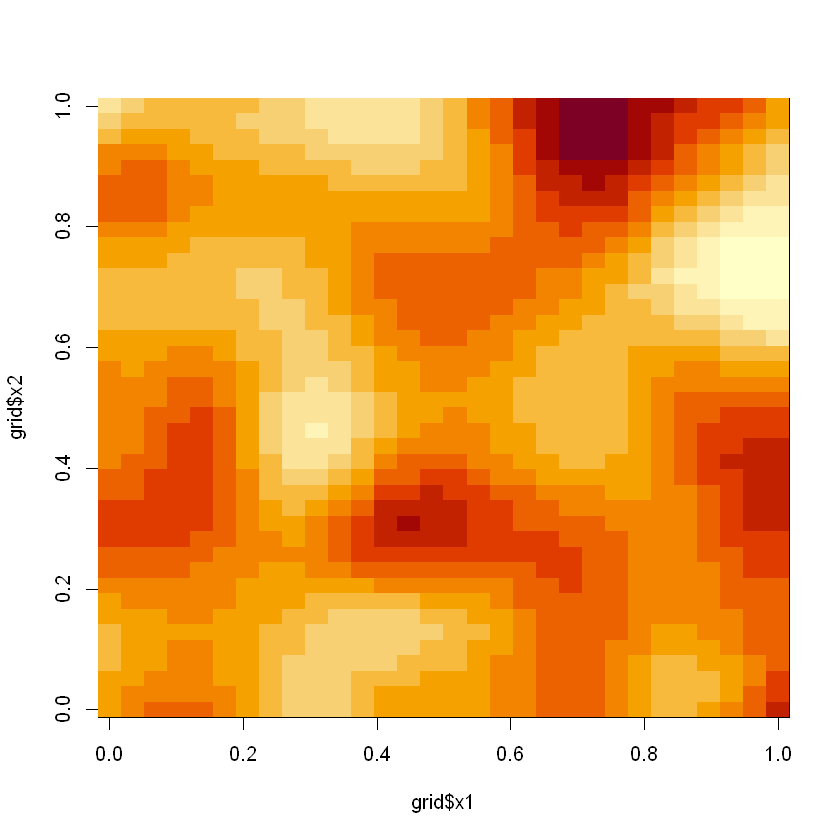

In [9]:
library(sparseFLMM)
library(mgcv)

grid <- list(
  x1 = seq(0,1, len = 30),
  x2 = seq(0,1, len = 40)
)
# the data set
d <- expand.grid(x1 = grid$x1, x2 = grid$x2)

# construct the 'raw' smooth
s <- smooth.construct(s(x1, x2, bs = "symm"), knots = NULL, data = d)


grid <- list(
  x1 = seq(0,1, len = 30),
  x2 = seq(0,1, len = 40)
)
d <- expand.grid(x1 = grid$x1, x2 = grid$x2)

s <- smooth.construct(s(x1, x2, bs = "symm", xt=list(skew=TRUE)), knots = NULL, data = d)

# here, the coefficients are still as desired 
# ncol(s$X)

# sample example coefs and y
set.seed(9043)
theta <- rnorm(ncol(s$X))
d$y <- c(s$X %*% theta) + rnorm(nrow(d), sd = .001) #add minimal noise

image(x = grid$x1, y = grid$x2, z = matrix(d$y, nrow = length(grid$x1)))

## Now fit model and extract old and new design matrices

In [12]:
# fit model
m <- bam(y ~ s(x1, x2, bs = "symm", xt=list(skew=TRUE)), data = d)
# extract smooth from model object
s_ <- m$smooth[[1]]

# get new design matrix
X_ <- PredictMat(s_, d)
# first column for the intercept
X_ <- cbind(1, X_)
#stopifnot(ncol(s$X) == ncol(X_)) # X2 is constraint design matrix

# regain original matrix also from model object
X <- Predict.matrix(s_, d) 
stopifnot(all.equal(s$X, X))

## Get basis trafo matrix

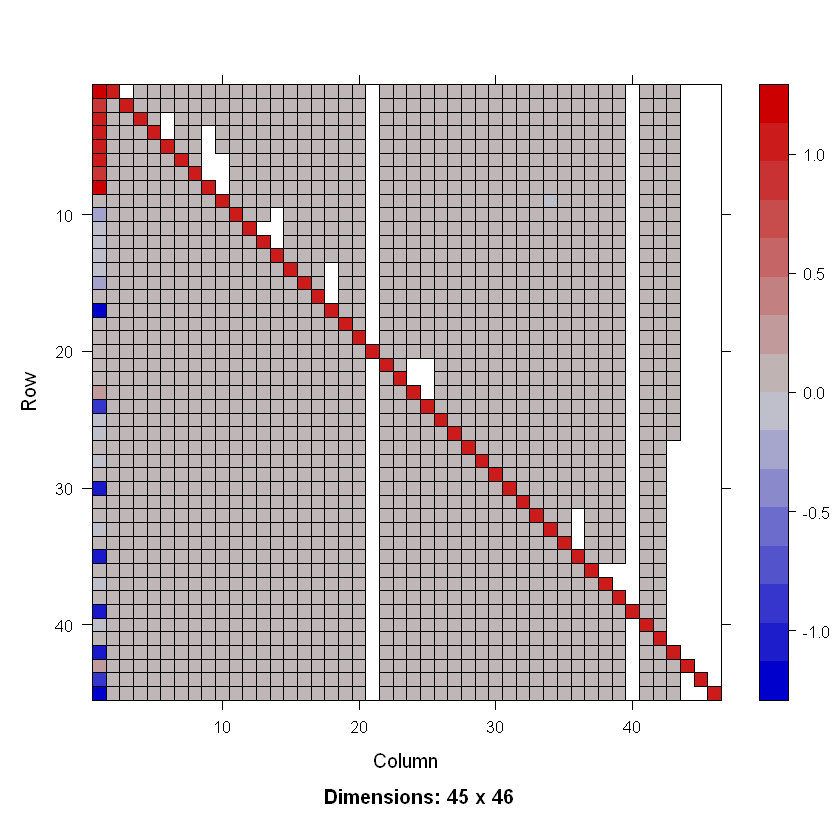

In [13]:
D <- solve(crossprod(X), crossprod(X, X_))
library(Matrix)
image(Matrix(D))

## Last step: Regain coefficients and compare result

In [14]:
# coefficients for old basis
theta <- D %*% coef(m)
# predict manually
d$p <- c(X %*% theta)

if(all.equal(d$p, as.numeric(predict(m)))) # as.numeric to drop all attributes
  message("Woohoooo it works!")

ERROR: Error in if (all.equal(d$p, as.numeric(predict(m)))) message("Woohoooo it works!"): argument is not interpretable as logical
